In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lenet1.lenet1 import LeNet1
from lenet1.create_data import create_data
from train import train

In [2]:
# creating retro 'MNIST' data
train_loader, test_loader = create_data()
print(f'samples:\t{len(train_loader.dataset) + len(test_loader.dataset)}')
print(f'samples train:\t{len(train_loader.dataset)}')
print(f'samples test:\t{len(test_loader.dataset)}')

samples:	9298
samples train:	7291
samples test:	2007


In [3]:
sample_input_train, sample_target_train = train_loader.dataset[0]
num_instances_train = len(train_loader.dataset)
print(f'({num_instances_train}, {sample_input_train.shape}, {sample_target_train})')


(7291, torch.Size([1, 16, 16]), 7)


### View some random numbers

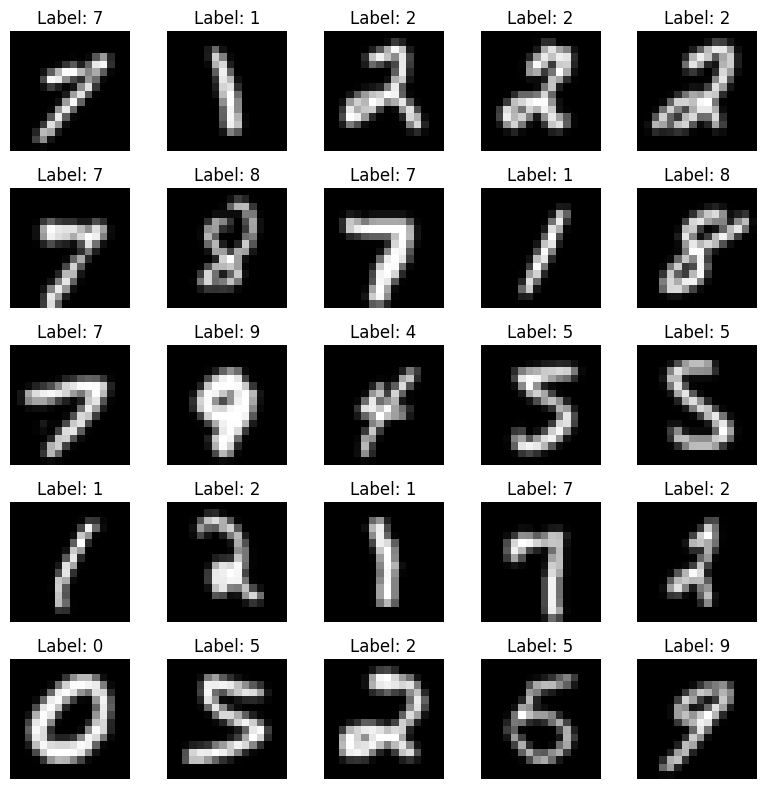

In [4]:
# plot some random images
N = 5
_, ax = plt.subplots(ncols=N,
                     nrows=N,
                     figsize=(8, 8))

# make indexing easier
ax = ax.flatten()

for i in range(N * N):
    image, label = train_loader.dataset[i]

    # 'image' is (1, 16, 16), squeeze to (16, 16)
    image = image.squeeze(0)

    ax[i].set_title(f'Label: {label}') 
    ax[i].imshow(image, cmap='grey')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

### View number distribution

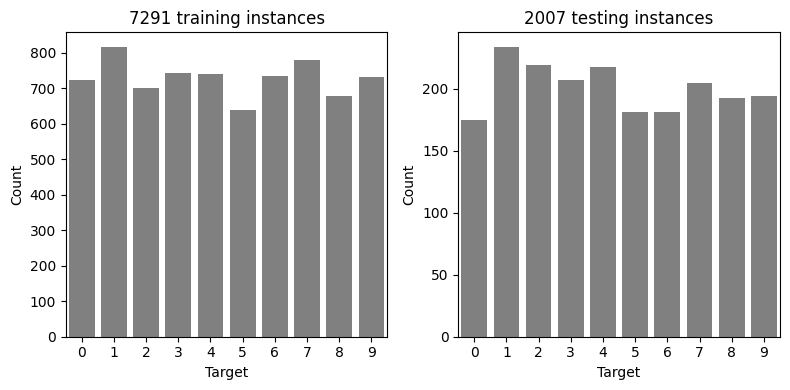

In [5]:
labels_train = []
labels_test = []

for i, (_, label) in enumerate(train_loader.dataset):
    labels_train.append(label)

for i, (_, label) in enumerate(test_loader.dataset):
    labels_test.append(label)

df_train = pd.DataFrame({'Target': labels_train})
df_test = pd.DataFrame({'Target': labels_test})

df_train = df_train['Target'].value_counts().reset_index(name='Count')
df_test = df_test['Target'].value_counts().reset_index(name='Count')

# plotting train and test distribution
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.flatten()

# ax 0
sns.barplot(
    x='Target',
    y='Count',
    data=df_train,
    color='grey',
    ax=ax[0])
ax[0].set_title(f'{df_train['Count'].sum()} training instances')

# ax 1
sns.barplot(
    x='Target',
    y='Count',
    data=df_test,
    color='grey',
    ax=ax[1])
ax[1].set_title(f'{df_test['Count'].sum()} testing instances')

plt.tight_layout()
plt.show()

In [6]:
# create the model
lenet = LeNet1()

# printing model stats
print(lenet)

Stats from LeNet-1
total units:              1256
total connections:        64660
independent parameters:   9760



In [ ]:
# start training
train(lenet, train_loader, test_loader, lr=0.1625, verbose=True, passes=23)

pass: 1
train report - loss: 0.09005	error: 0.88794	missclassifications: 6474
test  report - loss: 0.09018 	error: 0.88341 	missclassifications: 1773

pass: 2
train report - loss: 0.06207	error: 0.48402	missclassifications: 3529
test  report - loss: 0.06575 	error: 0.52267 	missclassifications: 1049

pass: 3
train report - loss: 0.01738	error: 0.09039	missclassifications: 659
test  report - loss: 0.02264 	error: 0.14051 	missclassifications: 282

pass: 4
train report - loss: 0.01037	error: 0.05761	missclassifications: 420
test  report - loss: 0.01507 	error: 0.09168 	missclassifications: 184

pass: 5
train report - loss: 0.00850	error: 0.04992	missclassifications: 364
test  report - loss: 0.01423 	error: 0.09018 	missclassifications: 181

pass: 6
train report - loss: 0.00668	error: 0.03676	missclassifications: 268
test  report - loss: 0.01232 	error: 0.07723 	missclassifications: 155

pass: 7
train report - loss: 0.00551	error: 0.02921	missclassifications: 213
test  report - loss: 0.01